# Python for Data Science course: PART 2
<img src="images/sklearn.png" width="300">

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms (i.e. support vector machines, random forests, gradient boosting, k-means…). It is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Python-for-Data-Science-course:-PART-2" data-toc-modified-id="Python-for-Data-Science-course:-PART-2-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Python for Data Science course: PART 2</a></span><ul class="toc-item"><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load Dataset<a class="anchor" id="load"></a></a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Classification<a class="anchor" id="classification"></a></a></span><ul class="toc-item"><li><span><a href="#Train-test-split" data-toc-modified-id="Train-test-split-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Train test split<a class="anchor" id="split"></a></a></span></li><li><span><a href="#Models" data-toc-modified-id="Models-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Models<a class="anchor" id="models"></a></a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.2.2.1"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Logistic Regression<a class="anchor" id="lr"></a></a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-1.2.2.2"><span class="toc-item-num">1.2.2.2&nbsp;&nbsp;</span>SVM<a class="anchor" id="svm"></a></a></span></li></ul></li><li><span><a href="#Plotting-results" data-toc-modified-id="Plotting-results-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Plotting results<a class="anchor" id="plot"></a></a></span></li></ul></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise<a class="anchor" id="exercise"></a></a></span><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot Data</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Split Data</a></span></li><li><span><a href="#Train-Models" data-toc-modified-id="Train-Models-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Train Models</a></span></li><li><span><a href="#Ploting-the-result" data-toc-modified-id="Ploting-the-result-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Ploting the result</a></span></li></ul></li></ul></div>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets as data
import math
import matplotlib.pyplot as plt

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

## Load Dataset<a class="anchor" id="load"></a>

In [8]:
wine = data.load_wine()

In [9]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['wine_type'] = wine.target

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
wine_type                       178 non-null int32
dtypes: float64(13), int32(1)
memory usage: 18.9 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [12]:
df.head().T

,0,1,2,3,4
alcohol,14.23,13.20,13.16,14.37,13.24
malic_acid,1.71,1.78,2.36,1.95,2.59
ash,2.43,2.14,2.67,2.50,2.87
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00
magnesium,127.00,100.00,101.00,113.00,118.00
total_phenols,2.80,2.65,2.80,3.85,2.80
flavanoids,3.06,2.76,3.24,3.49,2.69
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39
proanthocyanins,2.29,1.28,2.81,2.18,1.82
color_intensity,5.64,4.38,5.68,7.80,4.32


In [13]:
df.wine_type.unique()

array([0, 1, 2], dtype=int64)

In [14]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
wine_type                       0
dtype: int64

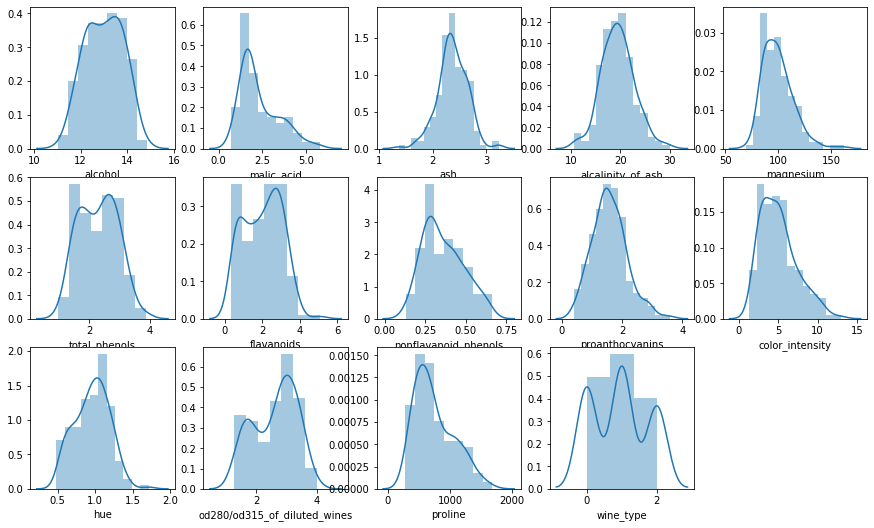

In [17]:
##Combination
columnNumber = 5
data_columns = df._get_numeric_data().columns.values
plot_columns = columnNumber
number_of_columns = math.ceil(len(data_columns)/plot_columns)
number_of_rows = math.ceil((len(data_columns))/number_of_columns)

plt.figure(figsize=(15, 12))
    
for i in range(0, len(data_columns)):
    plt.subplot(number_of_columns + 1, number_of_rows, i+1)
    sns.distplot(df[data_columns[i]], kde=True) 

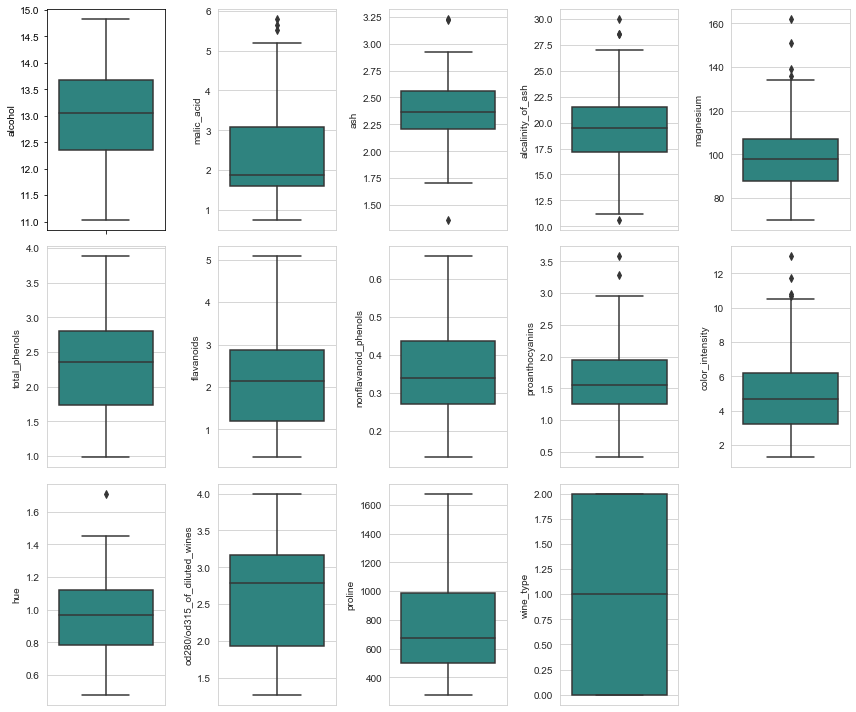

In [18]:
for i in range(0,len(data_columns)):
    plt.subplot(number_of_columns, number_of_rows, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[data_columns[i]],palette='viridis',orient='v')
    plt.tight_layout()

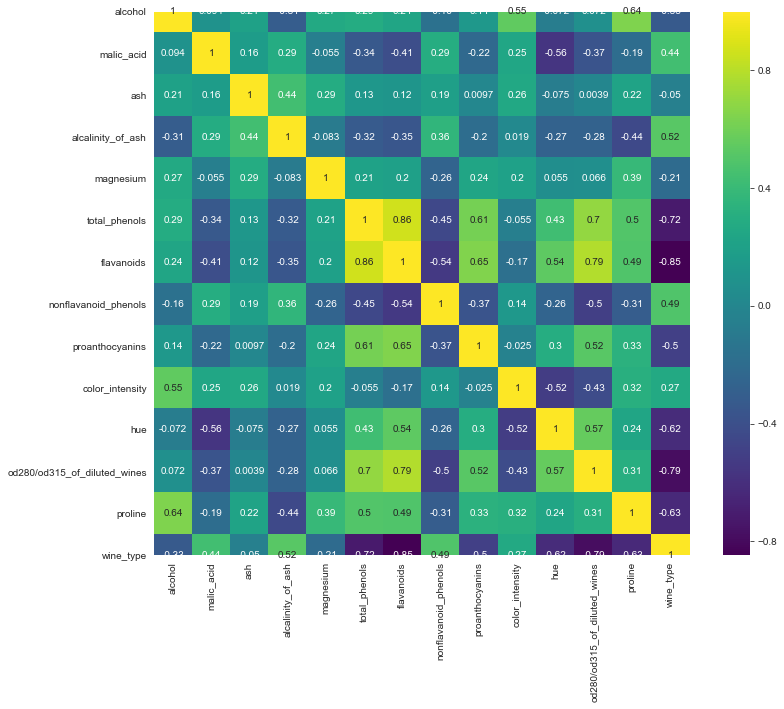

In [19]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap="viridis", annot = True)

## Classification<a class="anchor" id="classification"></a>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Train test split<a class="anchor" id="split"></a>

In [21]:
X = df.drop('wine_type', axis=1)
y = df['wine_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


### Models<a class="anchor" id="models"></a>
#### Logistic Regression<a class="anchor" id="lr"></a>

In [22]:
clf_log= LogisticRegression()
clf_log.fit(X_train, y_train)
clf_log.score(X_train, y_train)

C:\Users\lmendizb\AppData\Local\Continuum\anaconda3\envs\course\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lmendizb\AppData\Local\Continuum\anaconda3\envs\course\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9758064516129032

In [23]:
pred_log = clf_log.predict(X_test)
metrics.accuracy_score(y_test, pred_log)

1.0

#### SVM<a class="anchor" id="svm"></a>

In [24]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear', random_state=0)
clf_svm.fit(X_train, y_train)
clf_svm.score(X_train, y_train)

0.9919354838709677

In [25]:
pred_svm = clf_svm.predict(X_test)
metrics.accuracy_score(y_test, pred_svm)

0.9814814814814815

### Plotting results<a class="anchor" id="plot"></a>

In [26]:
metrics.confusion_matrix(pred_log, y_test)

array([[19,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 14]], dtype=int64)

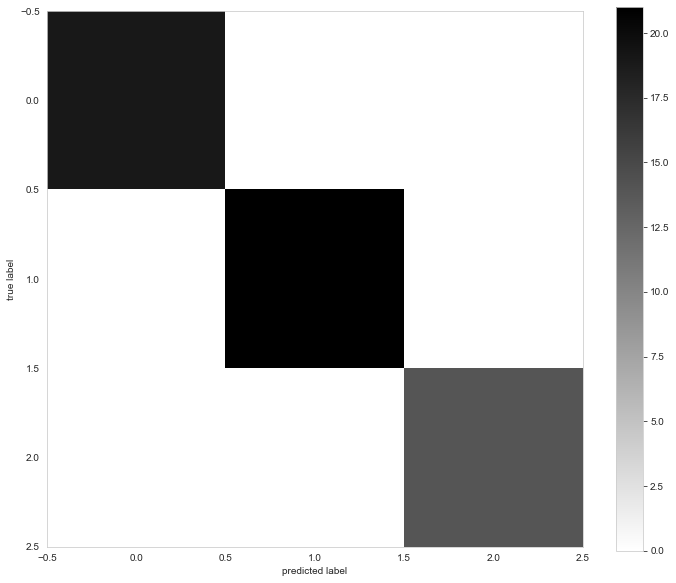

In [27]:
plt.imshow(metrics.confusion_matrix(pred_log, y_test),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

# Exercise<a class="anchor" id="exercise"></a>
Create your own model from scikit learn with the digits dataset to predict a digit from an image.
* Load Data
* Plot Data
* Split Data
* Train models
* Plot the result of the models

## Load Data

In [28]:
digits = data.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [29]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [30]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Plot Data

In [31]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

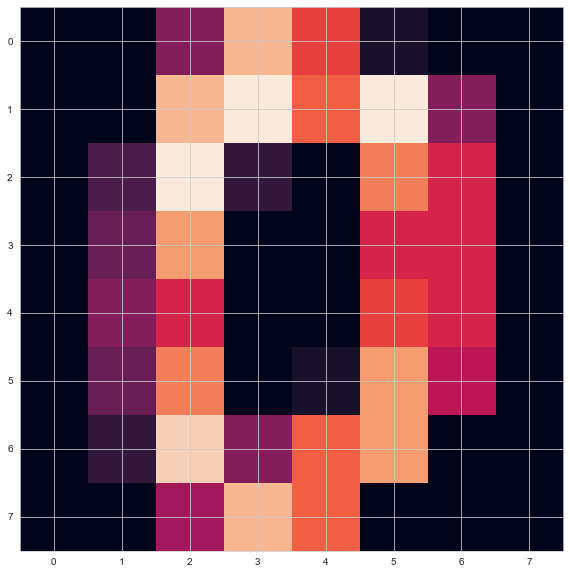

In [32]:
plt.imshow(digits.images[0])#,cmap=plt.cm.binary)

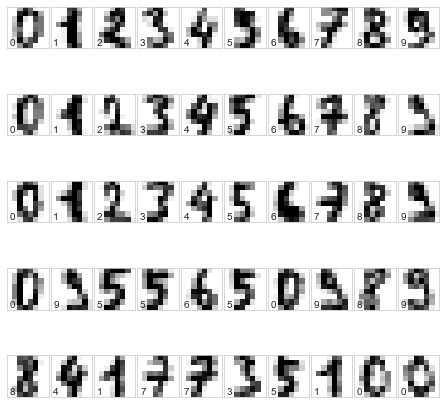

In [33]:
import matplotlib.pyplot as plt
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

## Split Data

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(1257, 64)
(540, 64)


## Train Models

In [35]:
clf_log= LogisticRegression()
clf_log.fit(X_train, y_train)
clf_log.score(X_train, y_train)

C:\Users\lmendizb\AppData\Local\Continuum\anaconda3\envs\course\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lmendizb\AppData\Local\Continuum\anaconda3\envs\course\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9952267303102625

In [36]:
pred_log = clf_log.predict(X_test)
metrics.accuracy_score(y_test, pred_log)

0.9537037037037037

In [37]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
clf_svm = SVC(kernel='linear', random_state=0)
clf_svm.fit(X_train, y_train)
clf_svm.score(X_train, y_train)

1.0

In [38]:
pred_svm = clf_svm.predict(X_test)
metrics.accuracy_score(y_test, pred_svm)

0.9796296296296296

## Ploting the result

In [39]:
metrics.confusion_matrix(pred_log, y_test)

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  1,  2,  0,  0,  1,  0],
       [ 0,  1, 47,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 59,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 61,  1,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 54,  0,  0],
       [ 0,  6,  0,  1,  0,  1,  0,  0, 41,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 54]], dtype=int64)

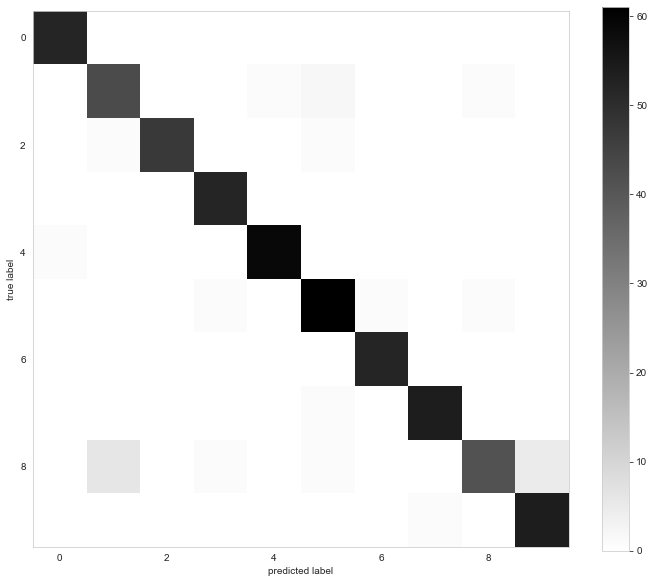

In [40]:
plt.imshow(metrics.confusion_matrix(pred_log, y_test),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(False)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");